# DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

In [52]:
#import required packages
import numpy as np
import pandas as pd

# 1. Data Exploration and Preprocessing:

In [53]:
# Load the dataset
df = pd.read_csv('adult_with_headers.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [54]:
df.shape

(32561, 15)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [56]:
df.describe(include = 'all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [57]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [58]:
df.head(40) #Some rows columns contains ? mark

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [59]:
# Replace ' ?' with np.nan
df.replace(' ?', np.nan, inplace=True)

In [60]:
df.head(40)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [61]:
df.duplicated().sum()

np.int64(24)

In [62]:
df.drop_duplicates(inplace = True)

In [63]:
df.duplicated().sum()

np.int64(0)

In [64]:
# Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [65]:
# Select only numeric columns for scaling
num_col = df.select_dtypes(include = ['int64']).columns
num_col

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [66]:
#Standard Scaler
std_sca = StandardScaler()

df_std = df.copy()
df_std[num_col] = std_sca.fit_transform(df[num_col])

print("Standard Scaling \n\n", df_std[num_col].head())

Standard Scaling 

         age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030390 -1.063569       1.134777      0.148292     -0.216743   
1  0.836973 -1.008668       1.134777     -0.145975     -0.216743   
2 -0.042936  0.245040      -0.420679     -0.145975     -0.216743   
3  1.056950  0.425752      -1.198407     -0.145975     -0.216743   
4 -0.776193  1.408066       1.134777     -0.145975     -0.216743   

   hours_per_week  
0       -0.035664  
1       -2.222483  
2       -0.035664  
3       -0.035664  
4       -0.035664  


In [67]:
#MinMax Scaler
minmax_sca = MinMaxScaler()

df_minmax = df.copy()
df_minmax[num_col] = minmax_sca.fit_transform(df[num_col])

print("MinMax Scaling \n\n", df_minmax[num_col].head())

MinMax Scaling 

         age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.301370  0.044302       0.800000       0.02174           0.0   
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.287671  0.138113       0.533333       0.00000           0.0   
3  0.493151  0.151068       0.400000       0.00000           0.0   
4  0.150685  0.221488       0.800000       0.00000           0.0   

   hours_per_week  
0        0.397959  
1        0.122449  
2        0.397959  
3        0.397959  
4        0.397959  



- Standard Scaler (Z-score) is best when distribution is Gaussian and algorithms are sensitive to variance.
- MinMaxScaler is preferred when we need bounded feature values (0–1).

# 2. Encoding Techniques:

In [68]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

####  One-Hot Encoding creates new binary columns (0 or 1) for each category in a column. for < 5 categories

In [69]:
# Select categorical columns
cat_cols = df.select_dtypes(include='object').columns

cat_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [70]:
#One-Hot Encoding for columns with ≤ 5 categories
one_hot_cols = [col for col in cat_cols if df[col].nunique() < 5]
print("Columns to One-Hot Encode (less than 5 unique categories): ", one_hot_cols)

Columns to One-Hot Encode (less than 5 unique categories):  ['sex', 'income']


In [71]:
df_encoded = pd.get_dummies(df, columns=['sex', 'income'], drop_first=True)

In [72]:
df_encoded.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'sex_ Male',
       'income_ >50K'],
      dtype='object')

In [73]:
df_encoded = df_encoded[['sex_ Male', 'income_ >50K']].astype(int)

In [74]:
# Preview changes
df_encoded[['sex_ Male', 'income_ >50K']]

,sex_ Male,income_ >50K
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0
...,...,...
32556,0,0
32557,1,1
32558,0,0
32559,1,0


#### Label Encoding for categorical variables with more than 5 categories.

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
#Label Encoding for columns with > 5 categories
label_encode_cols = [col for col in cat_cols if df[col].nunique() > 5]
print("Columns to apply Label Encoding:", label_encode_cols)

Columns to apply Label Encoding: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']


In [77]:
# Create a copy to preserve original
df_label_encoded = df.copy()

In [78]:
#Apply label encoding
le = LabelEncoder()
for col in label_encode_cols:
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col])

# Preview the result
df_label_encoded[label_encode_cols].head()

,workclass,education,marital_status,occupation,relationship,native_country
0,6,9,4,0,1,38
1,5,9,2,3,0,38
2,3,11,0,5,1,38
3,3,1,2,5,0,38
4,3,9,2,9,5,4


# 3. Feature Engineering:

In [79]:
#Encode the target column
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [80]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,NaN


In [81]:
print(df.columns.tolist())

['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']


#### Pros & Cons:
- One-Hot: Converts each category into a separate binary (0/1) column, ideal when categories are nominal (unordered), like sex, color, income. cons - high dimensionality
- Label Encoding: keeps the data compact and doesn’t increase dimensionality,  Faster to compute.

# 3. Feature Engineering

#### Create at least 2 new features

In [82]:
# Example: Age group and working hours per income

# age_group (Categorical Feature)
# Raw age is a continuous variable, but real-world income patterns often vary by life stage, not exact age.
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 45, 65, 100], labels=['Youth', 'Adult', 'Mid-age', 'Senior'])

# hours_per_education (Numerical Feature)
# This feature captures how many work hours are contributed per unit of education
df['hours_per_education'] = df['hours_per_week'] / (df['education_num'] + 1)

df[['age_group', 'hours_per_education']].head()

,age_group,hours_per_education
0,Adult,2.857143
1,Mid-age,0.928571
2,Adult,4.000000
3,Mid-age,5.000000
4,Adult,2.857143


#### Apply a transformation (e.g., log transformation)

In [83]:
#Identify skewed numerical features
df[num_col].skew().sort_values(ascending=False)

,0
capital_gain,11.949403
capital_loss,4.592702
fnlwgt,1.447703
age,0.557663
hours_per_week,0.228759
education_num,-0.309500


In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

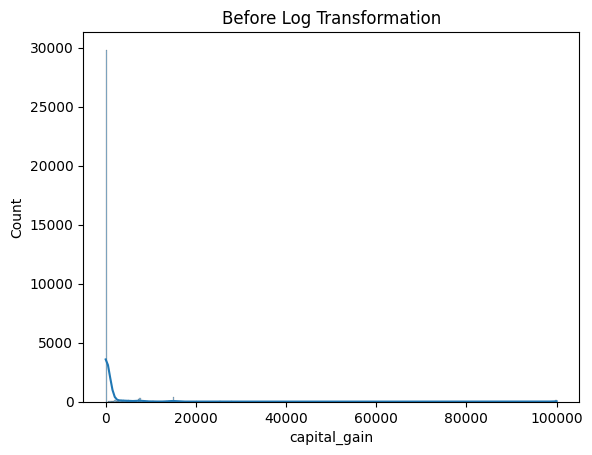

In [85]:
# Check skewness
sns.histplot(df['capital_gain'], kde=True)
plt.title("Before Log Transformation")
plt.show()

In [86]:
# Apply transformation
# Apply log(1 + x) to handle zeros
df['log_capital_gain'] = np.log1p(df['capital_gain'])

In [87]:
# Preview the transformation
df[['capital_gain', 'log_capital_gain']].head()

,capital_gain,log_capital_gain
0,2174,7.684784
1,0,0.000000
2,0,0.000000
3,0,0.000000
4,0,0.000000


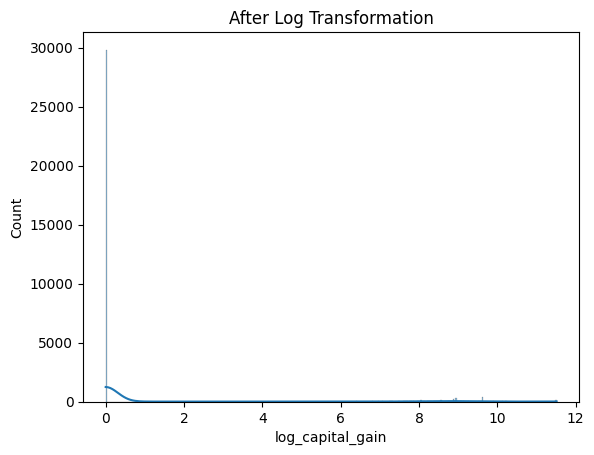

In [88]:
sns.histplot(df['log_capital_gain'], kde=True)
plt.title("After Log Transformation")
plt.show()

# 4. Feature Selection

### Isolation Forest for Outlier Detection

In [89]:
from sklearn.ensemble import IsolationForest

iso_forest  = IsolationForest(contamination=0.02, random_state=42) # 2% assumed outliers

# Fit and predict (returns 1 for inliers, -1 for outliers)
outlier_flags = iso_forest.fit_predict(df[num_col])

df['outlier'] = outlier_flags

In [90]:
df_no_outliers = df[df['outlier'] == 1].drop(columns='outlier')  # Keep only inliers

# Check the difference in shape
print("Original shape:", df.shape)
print("After removing outliers:", df_no_outliers.shape)

Original shape: (32537, 19)
After removing outliers: (31886, 18)


###  Predictive Power Score (PPS)

In [91]:
import ppscore as pps
import warnings
warnings.filterwarnings('ignore')

# Compute PPS matrix
pps_matrix = pps.matrix(df)

# Filter: only show PPS of features predicting 'income'
pps_target = pps_matrix[pps_matrix['y'] == 'income'][['x', 'ppscore']]

In [92]:
# Sort and show top features
pps_target.sort_values('ppscore', ascending=False).head(10)

,x,ppscore
280,income,1.0
33,workclass,0.0
14,age,0.0
52,fnlwgt,0.0
71,education,0.0
109,marital_status,0.0
90,education_num,0.0
147,relationship,0.0
166,race,0.0
185,sex,0.0


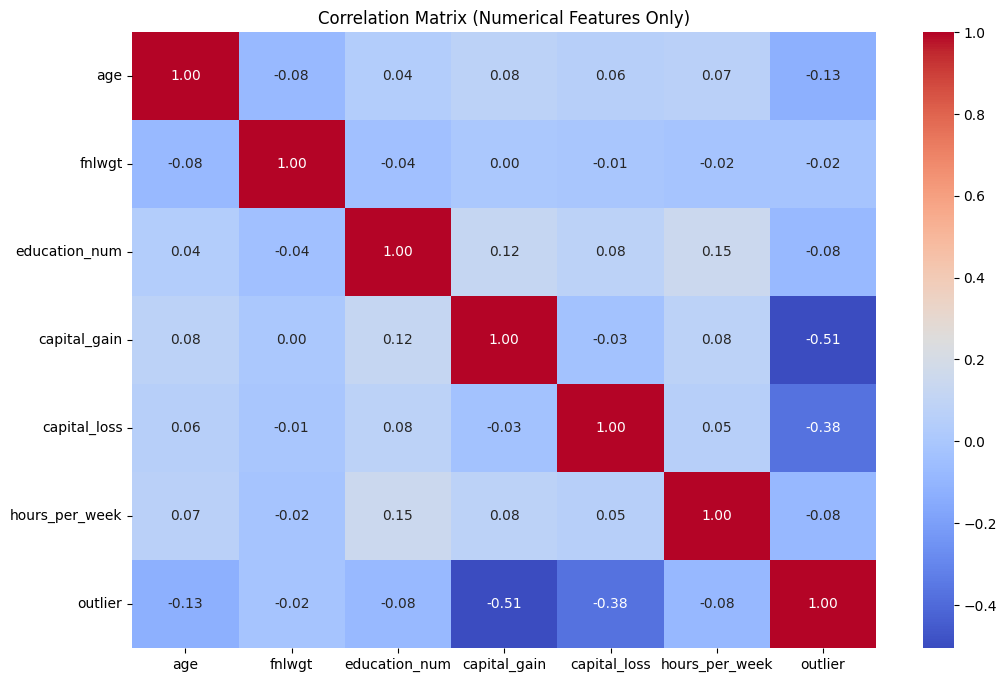

In [93]:
numeric_df = df.select_dtypes(include=['int64'])

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()